# ASR Model Evaluation and Testing
The model was developed using the **Kaldi Toolkit** and the **TIMIT Dataset**. It was trained on an **Ubuntu OS (Linux)**.
The system with the following specifications:
* 16 GB RAM
* 1000 GB SSD
* 8 GB GPU
 

In [2]:
# Install the jiwer library, which is used for measuring word error rate (WER) and other transcription errors.
!pip install jiwer
# Install the playsound library, which is used for playing sound files.
!pip install playsound

In [ ]:
# Import the pandas library, which is used for data manipulation and analysis.
import pandas as pd
# Import the pyplot module from the matplotlib library, which is used for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt
# Import the pandas library again (redundant as it was already imported above).
import pandas as pd
# Import the subprocess module, which allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes.
import subprocess
# Import the getpass module, which provides a way to securely handle password prompts.
import getpass
# Import the os module, which provides a way of using operating system-dependent functionality like reading or writing to the file system.
import os
# Import the wer function from the jiwer library, which calculates the word error rate for transcription error measurement.
from jiwer import wer
# Import the re module, which provides support for regular expressions in Python.
import re
# Import the playsound function from the playsound library, which is used for playing sound files.
from playsound import playsound
# Import the AudioSegment class from the pydub library, which is used for manipulating audio files.
from pydub import AudioSegment
# Import the play function from the pydub.playback module, which is used to play audio segments.
from pydub.playback import play


## 1. Preparing the Environment for Kaldi TIMIT Example Scripts

In [3]:
# Change the current working directory to the specified path.
# This path navigates to the 'timit/s5' directory inside the Kaldi example scripts for the TIMIT dataset.
# The command uses a magic command (%) which is specific to Jupyter notebooks or IPython environments.
%cd ../Desktop/NewKaldiFolder/kaldi/egs/timit/s5

/home/anas/Desktop/NewKaldiFolder/kaldi/egs/timit/s5


In [4]:
# Reviewing the Results After Completing Module Training
output = !./RESULTS
output

['%WER 31.7 | 400 15057 | 72.2 19.9 7.9 4.0 31.7 100.0 | -0.805 | exp/mono/decode_dev/score_4/ctm_39phn.filt.sys',
 '%WER 32.0 | 192 7215 | 71.2 19.2 9.6 3.2 32.0 100.0 | -0.433 | exp/mono/decode_test/score_5/ctm_39phn.filt.sys',
 '%WER 24.9 | 400 15057 | 79.0 15.8 5.2 3.9 24.9 99.8 | -0.165 | exp/tri1/decode_dev/score_10/ctm_39phn.filt.sys',
 '%WER 26.7 | 192 7215 | 77.2 17.2 5.6 3.9 26.7 100.0 | -0.150 | exp/tri1/decode_test/score_10/ctm_39phn.filt.sys',
 '%WER 22.9 | 400 15057 | 80.8 14.2 5.0 3.7 22.9 99.5 | -0.288 | exp/tri2/decode_dev/score_10/ctm_39phn.filt.sys',
 '%WER 23.7 | 192 7215 | 79.8 14.8 5.4 3.5 23.7 99.5 | -0.280 | exp/tri2/decode_test/score_10/ctm_39phn.filt.sys',
 '%WER 20.7 | 400 15057 | 82.5 12.8 4.8 3.2 20.7 99.3 | -0.565 | exp/tri3/decode_dev/score_10/ctm_39phn.filt.sys',
 '%WER 23.8 | 400 15057 | 80.4 15.0 4.6 4.2 23.8 99.8 | -0.398 | exp/tri3/decode_dev.si/score_8/ctm_39phn.filt.sys',
 '%WER 21.4 | 192 7215 | 81.7 13.5 4.8 3.2 21.4 99.5 | -0.637 | exp/tri3/deco

In [21]:
# Initialize lists to hold each column of data
wers = []
params = []
times = []
paths = []

# Iterate over each line in the output
for line in output:
    parts = line.split('|')  # Split the line into parts
    if len(parts) >= 5:  # Make sure there are enough parts
        wers.append(parts[0].strip())  # Get WER
        params.append(parts[1].strip())  # Get parameters
        times.append(parts[3].strip())  # Get time taken
        paths.append(parts[4].strip())  # Get the path to results

# Create a DataFrame
df = pd.DataFrame({
    'WER': wers,
    'Parameters': params,
    'Time Taken': times,
    'Result Path': paths
})


## 2. Evaluating the Model

As the training advanced, particularly with the incorporation of **Deep Neural Networks 
(DNNs)**, there was a marked enhancement in the model's accuracy. By the conclusion of the 
training process, the WER had substantially **decreased to 17.3%**. This improvement is 
indicative of the DNN's effectiveness in refining the model's ability to discern and process 
complex speech patterns. The graph below illustrates this trajectory of improvement, visually 
representing the decrease in WER from the initial monophone stage through to the
sophisticated DNN stage

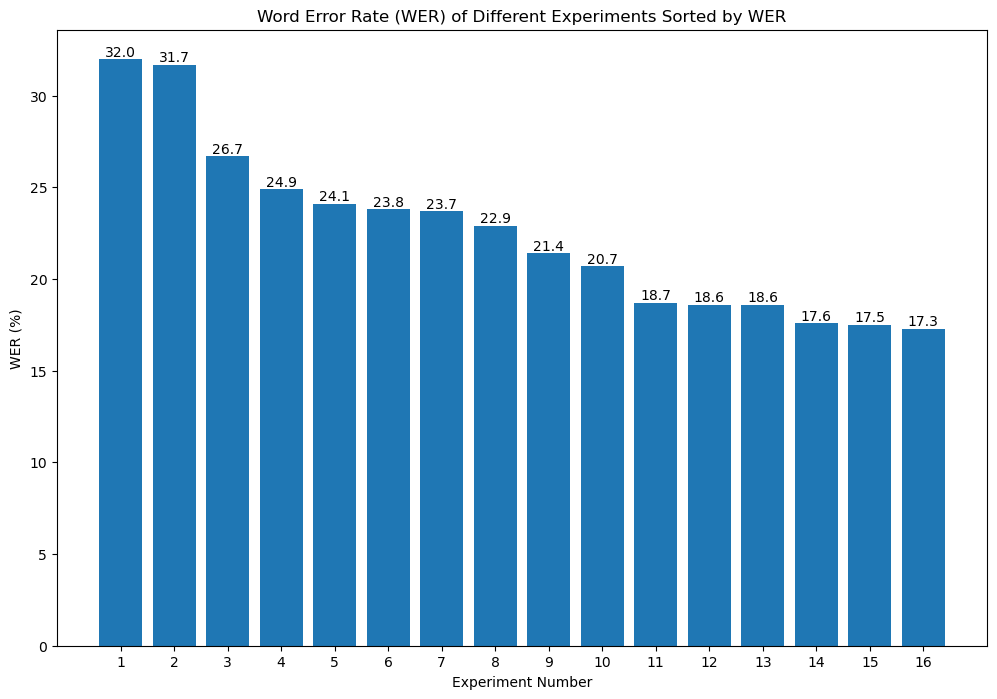

In [22]:
# Assuming 'df' is your DataFrame after parsing the output.

# Convert WER to numeric values for sorting and plotting
df['WER'] = pd.to_numeric(df['WER'].str.replace('%WER', '').str.strip())

# Sort the DataFrame by WER in descending order
df_sorted = df.sort_values('WER', ascending=False).reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(df_sorted.index, df_sorted['WER'])

# Add the data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Experiment Number')
plt.ylabel('WER (%)')
plt.title('Word Error Rate (WER) of Different Experiments Sorted by WER')
plt.xticks(df_sorted.index, df_sorted.index + 1)  # Set x-ticks to be the indices + 1 for readability
plt.show()


### Training Steps:

1. **Monophone Stage:**
The progression of the Automatic Speech Recognition (ASR) model, as evidenced by the 
data extracted from various training stages, exhibits a distinct trend of improvement in Word 
Error Rate (WER) with each subsequent phase. Initially, in the <span style="color: green;">monophone (mono) stage, 
the model registered a WER of 31.7%</span>, indicating a preliminary phase where the model is 
trained on basic phonetic units without considering the phonetic context.

2. **Triphone Stages:**
As the training progressed into the context-dependent model's <span style="color: green;">triphone stages (tri, tri1, and 
tri2), a noticeable reduction in WER was observed. Specifically, the WER dropped to 26.7%</span>
in the tri1 stage and further decreased through subsequent triphone iterations, reflecting the 
model's increasing proficiency in leveraging phonetic context to improve accuracy. This 
reduction underscores the importance of context-dependent modelling in speech recognition, 
where the phonetic environment of each sound is taken into account, enhancing the model's 
predictive accuracy.

3. **Deep Neural Network Stage:**
Further advancements were achieved during the <span style="color: green;">deep neural network (DNN) stages</span>, marked 
by a more substantial decrease in WER. Notably, when transitioning to the DNN stages, the 
<span style="color: green;">WER decreased to 17.3%</span>, illustrating the significant impact of integrating advanced neural 
network architectures. This phase leverages deep learning to capture more complex 
patterns and relationships in the data, which are not discernible with simpler models

In [24]:
# Display the first few rows of the DataFrame
df

,WER,Parameters,Time Taken,Result Path
0,31.7,400 15057,-0.805,exp/mono/decode_dev/score_4/ctm_39phn.filt.sys
1,32.0,192 7215,-0.433,exp/mono/decode_test/score_5/ctm_39phn.filt.sys
2,24.9,400 15057,-0.165,exp/tri1/decode_dev/score_10/ctm_39phn.filt.sys
3,26.7,192 7215,-0.150,exp/tri1/decode_test/score_10/ctm_39phn.filt.sys
4,22.9,400 15057,-0.288,exp/tri2/decode_dev/score_10/ctm_39phn.filt.sys
5,23.7,192 7215,-0.280,exp/tri2/decode_test/score_10/ctm_39phn.filt.sys
6,20.7,400 15057,-0.565,exp/tri3/decode_dev/score_10/ctm_39phn.filt.sys
7,23.8,400 15057,-0.398,exp/tri3/decode_dev.si/score_8/ctm_39phn.filt.sys
8,21.4,192 7215,-0.637,exp/tri3/decode_test/score_10/ctm_39phn.filt.sys
9,24.1,192 7215,-0.223,exp/tri3/decode_test.si/score_10/ctm_39phn.fil...


## 3. Testing the Model

In [2]:
decodingPath = "../Desktop/NewKaldiFolder/kaldi/egs/timit/s5/steps"
dataPath = "../Desktop/AudioTest/Simple1/SA1.WAV"

In [12]:
pythonVsersion = " python3"
fileName = " main.py "

In [20]:
def speechRecognition(audioFile):
    try:
        # Construct the command to run the speech recognition script with sudo
        command = "sudo -S " + pythonVsersion + fileName + audioFile
        
        # Prompt the user to enter their sudo password securely
        password = getpass.getpass("Enter Password (Sudo): ")
        
        # Run the command using subprocess.run, passing the password via input
        result = subprocess.run(command.split(), input=password, capture_output=True, text=True, universal_newlines=True)
        
        # Print any error messages from the command
        print(result.stderr)
    except:
        # Print an error message if the command fails
        print('Error: ', result.stderr)


def readFile(command):
    try:
        # Run the command with subprocess.run and capture the output
        result = subprocess.run(command.split(), capture_output=True, text=True)
        
        # Raise an exception if the command returns a non-zero exit code
        if result.returncode != 0:
            raise Exception(result.stderr)
        
        # Print the standard output of the command
        print(result.stdout)
    except Exception as error:
        # Print the error message if an exception occurs
        print("Error: ", error)



def convertToWavFromat(inputFile, outputFile, command2=""):
    # Use the provided command if available, otherwise construct the ffmpeg command
    if command2 == "":
        command = "ffmpeg -i " + inputFile + " " + outputFile
    else:
        command = command2
        
    # Run the command using subprocess.run and capture the output
    result = subprocess.run(command.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    
    # Print success or error messages based on the command's exit code
    if result.returncode == 0: 
        print("* The command was successful.")
        print(result.stderr)
    else:
        print("* An error occurred: ")
        print(result.stderr)

        
def calculateWordErrorRate(originalText, generatedText):
    # Convert both strings to lower case to ensure case insensitivity
    originalText = originalText.lower()
    generatedText = generatedText.lower()

    # Remove punctuation from both strings
    originalText = re.sub(r'[^\w\s]', '', originalText)
    generatedText = re.sub(r'[^\w\s]', '', generatedText)
    
    # Calculate the word error rate (WER)
    percentageWER = wer(originalText, generatedText)
    percentageWER *= 100
    
    # Round the WER percentage to two decimal places
    finalValue = round(percentageWER, 2)
    
    # Return the WER as a formatted string
    return f"{finalValue}%"

### a. Sample 1

In [14]:
inputFile1 = "./TestData/Sample1/Sample1.WAV"
outputFile1 = "./ConvertedSample1.wav"
convertToWavFromat(inputFile1, outputFile1)

* An error occurred: 
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis 

In [41]:
speechRecognition(outputFile1)

Enter Password (Sudo): ········
tree-info exp/chain_cleaned/tdnn_1d_sp/tree 
tree-info exp/chain_cleaned/tdnn_1d_sp/tree 
fstdeterminizestar --use-log=true 
fstminimizeencoded 
fsttablecompose data/lang_test_tgsmall/L_disambig.fst data/lang_test_tgsmall/G.fst 
fstpushspecial 
fstisstochastic data/lang_test_tgsmall/tmp/LG.fst 
fstcomposecontext --context-size=2 --central-position=1 --read-disambig-syms=data/lang_test_tgsmall/phones/disambig.int --write-disambig-syms=data/lang_test_tgsmall/tmp/disambig_ilabels_2_1.int data/lang_test_tgsmall/tmp/ilabels_2_1.63995 data/lang_test_tgsmall/tmp/LG.fst 
fstisstochastic data/lang_test_tgsmall/tmp/CLG_2_1.fst 
make-h-transducer --disambig-syms-out=exp/chain_cleaned/tdnn_1d_sp/graph_tgsmall/disambig_tid.int --transition-scale=1.0 data/lang_test_tgsmall/tmp/ilabels_2_1 exp/chain_cleaned/tdnn_1d_sp/tree exp/chain_cleaned/tdnn_1d_sp/final.mdl 
fsttablecompose exp/chain_cleaned/tdnn_1d_sp/graph_tgsmall/Ha.fst 'fstrmsymbols --remove-arcs=true --apply-t

In [18]:
#playsound('./ConvertedSample1.wav')
audio = AudioSegment.from_wav(outputFile1)
play(audio)

Input #0, wav, from '/tmp/tmp67g98st8.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:02.84, bitrate: 256 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 16000 Hz, 1 channels, s16, 256 kb/s


In [46]:
# Original Text
command = "cat ./TestData/Sample1/Sample1Text"
readFile(command)

0 45466 The sermon emphasized the need for affirmative action.



In [47]:
# Generated text
command = "cat ./out.txt"
readFile(command)

./ConvertedSample1 THE SERMON EMPHASIZE THE NEED FOR AFFIRMATIVE ACTION 



In [69]:
# Sample original text
originalTextSample1 = "The sermon emphasized the need for affirmative action."
# Sample generated text
generatedTextSample1 = "THE SERMON EMPHASIZE THE NEED FOR AFFIRMATIVE ACTION"
# Calculating Word-Error-Rate (WER) between the original and generated text
WordErrorRate = calculateWordErrorRate(originalTextSample1, generatedTextSample1)
# Printing the calculated WER
print("Word Error Rate:", WordErrorRate)

Word Error Rate: 12.5%


#### **Performance Assessment:** 
In the evaluation of Sample 1 from the ASR model testing, the system processed an audio 
file, converting it into a textual output that was then compared against a pre-defined original 
text for accuracy assessment. The original text for this sample reads: "The sermon 
emphasized the need for affirmative action." However, the ASR-generated text was: "THE 
SERMON EMPHASIZE THE NEED FOR AFFIRMATIVE ACTION." This discrepancy 
highlights a slight variation in verb tense, where the original "emphasized" was recognized 
as "emphasize". The evaluation metric used to quantify the accuracy of the transcription is 
the Word Error Rate (WER), A WER of 12.5% suggests that the ASR model has a moderate 
level of accuracy, capturing the essence of the spoken text with some errors in verb 
conjugation. The result indicates that while the ASR system can effectively capture the 
content of the speech, there are areas of improvement, particularly in accurately recognizing 
verb tenses, which could enhance the overall effectiveness of the system.

### b. Sample 2

In [15]:
inputFile2 = "./TestData/Sample2/Sample2.WAV"
outputFile2 = "./ConvertedSample2.wav"
convertToWavFromat(inputFile2, outputFile2)

* An error occurred: 
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis 

In [48]:
speechRecognition(outputFile2)

Enter Password (Sudo): ········
tree-info exp/chain_cleaned/tdnn_1d_sp/tree 
tree-info exp/chain_cleaned/tdnn_1d_sp/tree 
fsttablecompose data/lang_test_tgsmall/L_disambig.fst data/lang_test_tgsmall/G.fst 
fstpushspecial 
fstminimizeencoded 
fstdeterminizestar --use-log=true 
fstisstochastic data/lang_test_tgsmall/tmp/LG.fst 
fstcomposecontext --context-size=2 --central-position=1 --read-disambig-syms=data/lang_test_tgsmall/phones/disambig.int --write-disambig-syms=data/lang_test_tgsmall/tmp/disambig_ilabels_2_1.int data/lang_test_tgsmall/tmp/ilabels_2_1.65376 data/lang_test_tgsmall/tmp/LG.fst 
fstisstochastic data/lang_test_tgsmall/tmp/CLG_2_1.fst 
make-h-transducer --disambig-syms-out=exp/chain_cleaned/tdnn_1d_sp/graph_tgsmall/disambig_tid.int --transition-scale=1.0 data/lang_test_tgsmall/tmp/ilabels_2_1 exp/chain_cleaned/tdnn_1d_sp/tree exp/chain_cleaned/tdnn_1d_sp/final.mdl 
fstrmepslocal 
fstrmsymbols exp/chain_cleaned/tdnn_1d_sp/graph_tgsmall/disambig_tid.int 
fsttablecompose exp

In [19]:
# PLay audio: Sample 2
audio = AudioSegment.from_wav(outputFile2)
play(audio)

Input #0, wav, from '/tmp/tmpby_fsn8y.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:02.94, bitrate: 256 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 16000 Hz, 1 channels, s16, 256 kb/s


In [49]:
# Original Text
command = "cat ./TestData/Sample2/Sample2Text"
readFile(command)

0 47104 I took her word for it, but is she really going with you?



In [50]:
# Generated Text
command = "cat ./out.txt"
readFile(command)

./ConvertedSample2 I TOOK HER WORD FOR IT BIT AS SHE REALLY GOING WITH YOU 



In [68]:
# Sample original text
originalTextSample2 = "I took her word for it, but is she really going with you?"
# Sample generated text
generatedTextSample2 = "I TOOK HER WORD FOR IT BIT AS SHE REALLY GOING WITH YOU"
# Calculating Word-Error-Rate (WER) between the original and generated text
WordErrorRate = calculateWordErrorRate(originalTextSample2, generatedTextSample2)
# Printing the calculated WER
print("Word Error Rate:", WordErrorRate)  ##Word Error Rate: 15.38%

Word Error Rate: 15.38%


#### Performance Assessment:
In the evaluation of Sample 2 from the testing of the Automatic Speech Recognition (ASR) 
model, the ASR system was tasked with transcribing an audio sample into text, which was 
subsequently compared to a predetermined original text to assess transcription accuracy. 
The original text for Sample 2 states: "I took her word for it, but is she really going with you?" 
However, the ASR-generated text read: "I TOOK HER WORD FOR IT BIT AS SHE REALLY 
GOING WITH YOU," indicating a misinterpretation of the conjunction "but" as "bit" and a 
missing "is.".
The Word Error Rate (WER) for this sample was calculated to be 15.38%. The WER 
quantifies the percentage of errors present in the generated text by accounting for 
substitutions, deletions, and insertions relative to the length of the original text. A WER of 
15.38% suggests that while the model is capable of capturing the general context of the
spoken content, there are notable errors that impact the preciseness of the transcription. 
This discrepancy highlights areas where the model's performance could be enhanced, 
particularly in its ability to accurately recognize conjunctions and maintain grammatical 
structure.

### c. Sample 3: (noisy Data)

In [27]:
inputFile3= "./TestData/Sample3/Sample3MP3.mp3"
outputFile3 = "./ConvertedSample3.wav"
command = "ffmpeg -i ./TestData/Sample3/Sample3MP3.mp3 -acodec pcm_s16le -ar 44100 -ac 2 ConvertedSample3.wav"
convertToWavFromat(inputFile3, outputFile3, command)

* The command was successful.
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-li

In [34]:
audio = AudioSegment.from_wav(outputFile3)
play(audio)

Input #0, wav, from '/tmp/tmp2dwhrilb.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:21.29, bitrate: 1411 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 2 channels, s16, 1411 kb/s


In [29]:
speechRecognition(outputFile3)

Enter Password (Sudo): ········
[sudo] password for anas: tree-info exp/chain_cleaned/tdnn_1d_sp/tree 
tree-info exp/chain_cleaned/tdnn_1d_sp/tree 
fsttablecompose data/lang_test_tgsmall/L_disambig.fst data/lang_test_tgsmall/G.fst 
fstminimizeencoded 
fstpushspecial 
fstdeterminizestar --use-log=true 
fstisstochastic data/lang_test_tgsmall/tmp/LG.fst 
fstcomposecontext --context-size=2 --central-position=1 --read-disambig-syms=data/lang_test_tgsmall/phones/disambig.int --write-disambig-syms=data/lang_test_tgsmall/tmp/disambig_ilabels_2_1.int data/lang_test_tgsmall/tmp/ilabels_2_1.79561 data/lang_test_tgsmall/tmp/LG.fst 
fstisstochastic data/lang_test_tgsmall/tmp/CLG_2_1.fst 
make-h-transducer --disambig-syms-out=exp/chain_cleaned/tdnn_1d_sp/graph_tgsmall/disambig_tid.int --transition-scale=1.0 data/lang_test_tgsmall/tmp/ilabels_2_1 exp/chain_cleaned/tdnn_1d_sp/tree exp/chain_cleaned/tdnn_1d_sp/final.mdl 
fstrmepslocal 
fsttablecompose exp/chain_cleaned/tdnn_1d_sp/graph_tgsmall/Ha.fst '

In [32]:
command = "cat ./TestData/Sample3/Sample3Text.txt"
readFile(command)

Astronomy is the study of everything in the universe beyond Earth's atmosphere. That includes objects we can see with our naked eyes, like the Sun, the Moon, the planets, and the stars. 



In [33]:
command = "cat ./out.txt"
readFile(command)

./ConvertedSample3 OSTROM M OU THORBURN WHO REUBEN M RUFE YOM RUBENS HOOPOES ROUE BURR UNDERD OR GROUP ROOK GROOM HUGH WHOM GAVAN'S MOORED REFORM MOON BOOF MONARCH FROM BOOF OFF 



#### Analysis and Conclusion:
The ASR (Automatic Speech Recognition) model's generated text has a WER of 100.0% compared to the original text. **This extremely high error rate indicates that the ASR model performed poorly on the provided noisy audio data**. The model likely failed to accurately transcribe the text because it was not trained on noisy data. This underscores the importance of training ASR models on diverse datasets that include noisy audio samples to improve their robustness and performance in real-world scenarios where noise is often present.